Precisión del modelo: 85.71%

Matriz de Confusión:
            Predicción Sin Cáncer  Predicción Con Cáncer
Sin Cáncer                      1                      1
Con Cáncer                      0                      5

Reporte de Resultados:
              precision    recall  f1-score   support

  Sin Cáncer       1.00      0.50      0.67         2
  Con Cáncer       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7


Área Bajo la Curva (AUC) de la curva ROC: 1.00


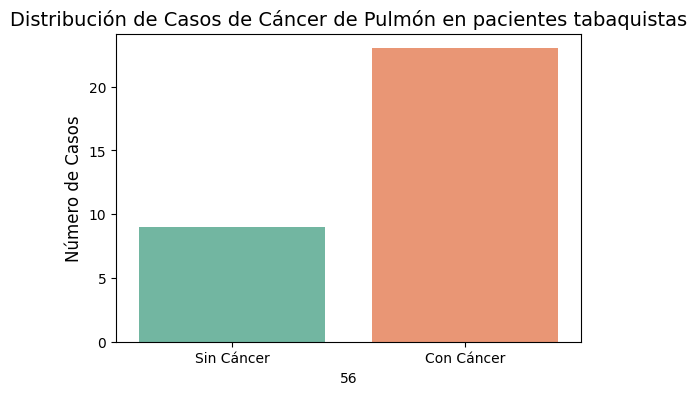

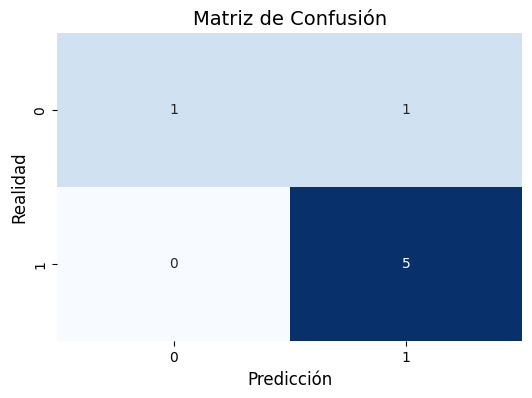

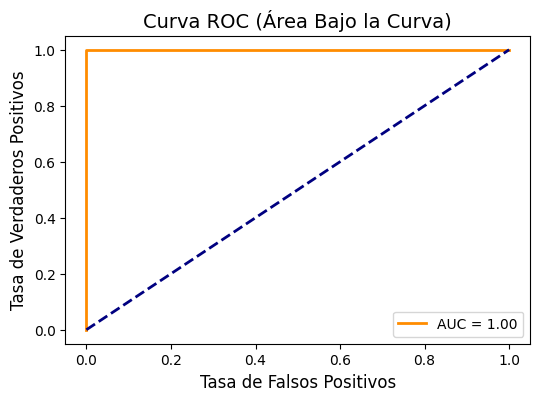

In [42]:
# Importamos las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que los gráficos se muestren dentro del notebook
%matplotlib inline

# Cargar el archivo .data en un DataFrame de pandas
df = pd.read_csv('/Users/antonelamenna/Desktop/Machine Learning proyect/lung+cancer/lung-cancer.data', header=None)

# Reemplazar '?' por valores nulos (NaN)
df.replace('?', pd.NA, inplace=True)

# Convertir todas las columnas a numéricas (esto forzará las no numéricas a NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# Imputamos los valores faltantes con la mediana para las columnas numéricas
df.fillna(df.median(), inplace=True)

# Dividir el DataFrame en las características (X) y la etiqueta (y)
X = df.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = df.iloc[:, -1]   # La última columna (etiquetas)

# Convertir las clases 2 a 1 para tener un formato binario
y = y.apply(lambda x: 1 if x == 2 else 0)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones con el modelo entrenado
y_pred_rf = rf_model.predict(X_test)

# Calcular la precisión
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Mostrar la precisión
print(f"Precisión del modelo: {rf_accuracy * 100:.2f}%")

# 1️⃣ Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, index=['Sin Cáncer', 'Con Cáncer'], columns=['Predicción Sin Cáncer', 'Predicción Con Cáncer'])

print("\nMatriz de Confusión:")
print(cm_df)

# 2️⃣ Mostrar el reporte de métricas
from sklearn.metrics import classification_report
print("\nReporte de Resultados:")
print(classification_report(y_test, y_pred_rf, target_names=['Sin Cáncer', 'Con Cáncer']))

# 3️⃣ Mostrar los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print(f"\nÁrea Bajo la Curva (AUC) de la curva ROC: {roc_auc:.2f}")

# Gráficos (opcionales y al final, como adicionales)

# 1️⃣ Gráfico de la distribución de clases en el conjunto de datos
plt.figure(figsize=(6, 4))
sns.countplot(x=y, hue=y, palette='Set2', legend=False)
plt.title('Distribución de Casos de Cáncer de Pulmón en pacientes tabaquistas', fontsize=14)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks([0, 1], ['Sin Cáncer', 'Con Cáncer'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 2️⃣ Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión', fontsize=14)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Realidad', fontsize=12)
plt.show()

# 3️⃣ Curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC (Área Bajo la Curva)', fontsize=14)
plt.xlabel('Tasa de falsos positivos', fontsize=12)
plt.ylabel('Tasa de verdaderos positivos', fontsize=12)
plt.legend(loc='lower right')
plt.show()
